## LOFAR VIDEO MAKER

In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
import os
import sys
import time
import datetime
import glob
import numpy as np

from lofarantpos.db import LofarAntennaDatabase
from lofarimaging import read_acm_cube, get_station_type, make_xst_plots
from lofarantpos.db import LofarAntennaDatabase

# Data folders

In [3]:
caltable_dir = "./test/CalTables"
data_files = "../data/sess_sid20230111T071252_LV614/scan_59955.30061/LV614_20230111_071256_spw3_sb51_461_int1_dur24300_dir0,0,SUN_xst/"
os.makedirs('results', exist_ok=True)

# General Values

In [4]:
station_name = "LV614"
rcu_mode = "3"
station_type = get_station_type(station_name)

In [5]:
import re
 # Read subband from .h file
def get_subbands(file_path):

    with open(file_path, 'r') as file:
        content = file.read()

    # Find the subband number using regex
    match = re.search(r'--xcsubband=(\d+)', content)
    if match:
        subband = int(match.group(1))
    else:
        subband = None 

    return subband

# Sort files by subband

In [6]:
def sort_files_by_subband(output_folder):
    from collections import defaultdict
    dat_files = sorted(glob.glob(os.path.join(data_files, '*.dat')))
    h_files = sorted(glob.glob(os.path.join(data_files, '*.h')))

    subband_dict = defaultdict(list)

    # Make a dictonary to classify files by subband
    for file in h_files:
        subband = get_subbands(file)
        if subband is not None:
            subband_dict[subband].append(file)

    # Create all the folders and moves the files
    for subband, files in sorted(subband_dict.items()):
        subband_folder = os.path.join(output_folder, f"subband_{subband}")
        os.makedirs(subband_folder, exist_ok=True)

        for file in files:
            filename = os.path.basename(file)
            new_path = os.path.join(subband_folder, filename)
            os.rename(file, new_path)
            print(f"Moved: {filename} → {subband_folder}")

            # Moving .dat
            dat_file = file.replace(".h", ".dat")  # Cambiar extensión
            if os.path.exists(dat_file):
                dat_filename = os.path.basename(dat_file)
                new_dat_path = os.path.join(subband_folder, dat_filename)
                os.rename(dat_file, new_dat_path)
                print(f"Moved: {dat_filename} → {subband_folder}")

# sort_files_by_subband("./sorted_subbands")

In [7]:
def get_visibilitiesObstime(dat_path):
    obsdatestr, obstimestr, *_ = os.path.basename(dat_path).rstrip(".dat").split("_")
    obstime = datetime.datetime.strptime(obsdatestr + ":" + obstimestr, '%Y%m%d:%H%M%S')
    visibilities = read_acm_cube(dat_path, station_type)[0]
    return visibilities, obstime

def get_img_from_subband(folder_with_subbands_sorted, requested_subbands = [263, 164, 419], outputpath="./imgSameSubband"):
    # Clear the output directory
    if os.path.exists(outputpath):
        for file in glob.glob(os.path.join(outputpath, '*')):
            os.remove(file)
    else:
        os.makedirs(outputpath, exist_ok=True)
    for subband in requested_subbands:
        subband_folder = os.path.join(folder_with_subbands_sorted, f"subband_{subband}")
        if os.path.exists(subband_folder):  # Check if it exists in the folder
            dat_files = sorted(glob.glob(os.path.join(subband_folder, '*.dat')))
            for dat_file in dat_files:
                visibilities, obstime = get_visibilitiesObstime(dat_file)
                make_xst_plots(visibilities, station_name, obstime, subband, rcu_mode, outputpath=outputpath)
        else:
            print(f"Subband {subband} not found {folder_with_subbands_sorted}")

get_img_from_subband("./sorted_subbands", [160, 277, 419])

350.85 deg 350.85
Cas A 50d55m35.7033413s 39d04m21.38143487s
Cyg A 40d13m38.35749243s 49d46m21.98317356s
Per A 80d23m57.64081765s 9d35m54.40794628s
Her A 53d22m44.54068068s 36d37m24.29333158s
Cen A 106d03m17.37649119s -16d02m47.29141959s
Vir A 60d36m53.14330724s 29d23m21.30394742s
3C295 17d09m25.84372901s 72d50m36.51539966s
Moon 74d03m08.11099195s 15d04m28.45749064s
Sun 89d59m54.63166562s -0d00m03.42861341s
3C196 62d28m40.65546773s 27d31m23.53859417s


350.85 deg 350.85
Cas A 49d45m05.34966924s 40d14m51.59821554s
Cyg A 38d23m06.2046338s 51d36m53.95745121s
Per A 80d05m11.70888903s 9d54m40.00030888s
Her A 52d59m19.05417261s 37d00m49.47062049s
Cen A 106d59m05.82181048s -16d58m35.85355674s
Vir A 62d17m55.95358309s 27d42m18.70202883s
3C295 18d59m36.38735562s 71d00m26.15044185s
Moon 75d52m37.50435316s 13d14m33.30303889s
Sun 88d42m21.96031606s 1d17m29.23658675s
3C196 63d40m42.52337399s 26d19m21.48384532s


350.85 deg 350.85
Cas A 48d32m04.25161635s 41d27m52.56063085s
Cyg A 36d32m42.61606447s 53d27m17.37507897s
Per A 79d41m32.44523144s 10d18m18.91783533s
Her A 52d43m59.40246294s 37d16m08.82803752s
Cen A 107d58m52.89776412s -17d58m23.05770269s
Vir A 64d01m22.06297924s 25d58m52.78542029s
3C295 20d50m06.4315591s 69d09m56.26651762s
Moon 77d41m59.28268119s 11d24m49.06522806s
Sun 87d28m54.8021338s 2d30m56.39275992s
3C196 64d49m28.43293925s 25d10m35.35400995s


350.85 deg 350.85
Cas A 47d16m38.02207199s 42d43m18.65791123s
Cyg A 34d42m46.8598563s 55d17m12.96968232s
Per A 79d13m03.80760257s 10d46m47.2059995s
Her A 52d36m53.8083419s 37d23m14.14193781s
Cen A 109d02m30.65917839s -19d02m00.95965102s
Vir A 65d46m48.75835036s 24d13m26.26474844s
3C295 22d40m36.40105246s 67d19m26.43715083s
Moon 79d30m58.75619218s 9d35m30.47943059s
Sun 86d19m47.40599132s 3d40m03.79031661s
3C196 65d54m50.99171856s 24d05m12.54197785s


350.85 deg 350.85
Cas A 45d58m52.2818746s 44d01m04.27129287s
Cyg A 32d53m41.10915044s 57d06m18.5695948s
Per A 78d39m50.48752779s 11d20m00.17657554s
Her A 52d38m06.12542499s 37d22m01.55749722s
Cen A 110d09m50.91112605s -20d09m21.36539458s
Vir A 67d33m54.51704442s 22d26m20.66035238s
3C295 24d30m51.15337919s 65d29m11.80337673s
Moon 81d19m21.46213827s 7d46m52.02058617s
Sun 85d15m13.75788512s 4d44m37.44253176s
3C196 66d56m42.94187466s 23d03m20.30634944s


350.85 deg 350.85
Cas A 44d38m52.64581615s 45d21m03.78799649s
Cyg A 31d05m51.24620788s 58d54m08.29377199s
Per A 78d01m57.85996919s 11d57m52.45792328s
Her A 52d47m35.69213752s 37d12m31.73476584s
Cen A 111d20m45.256789s -21d20m15.87896832s
Vir A 69d22m18.8955219s 20d37m56.41367203s
3C295 26d20m38.41135402s 63d39m24.64123883s
Moon 83d06m53.07609661s 5d59m07.99278521s
Sun 84d15m27.46883865s 5d44m23.73765219s
3C196 67d54m57.19666616s 22d05m05.73495451s


350.85 deg 350.85
Cas A 43d16m44.71034059s 46d43m11.61351342s
Cyg A 29d19m47.88319972s 60d40m11.53095792s
Per A 77d19m31.92801752s 12d40m18.05025223s
Her A 53d05m17.35693786s 36d54m49.82349436s
Cen A 112d35m05.14087851s -22d34m35.94584971s
Vir A 71d11m42.40783604s 18d48m33.008774s
3C295 28d09m47.79598114s 61d50m15.32883484s
Moon 84d53m19.33034789s 4d12m32.61179797s
Sun 83d20m41.64890605s 6d39m09.56490386s
3C196 68d49m26.8799259s 21d10m35.70537712s


350.85 deg 350.85
Cas A 41d52m34.04292618s 48d07m22.1822091s
Cyg A 27d36m07.64503106s 62d23m51.65680709s
Per A 76d32m39.26407017s 13d27m10.38440211s
Her A 53d31m01.67244103s 36d29m05.26906913s
Cen A 113d52m41.88802293s -23d52m12.8913264s
Vir A 73d01m46.39962049s 16d58m29.09836914s
3C295 29d58m10.20958869s 60d01m52.96316142s
Moon 86d38m25.93976976s 2d27m20.08013965s
Sun 82d31m08.76961412s 7d28m42.45206112s
3C196 69d40m05.36801927s 20d19m56.84299618s


350.85 deg 350.85
Cas A 40d26m26.17313314s 49d33m29.96626272s
Cyg A 25d55m34.7495416s 64d04m24.453616s
Per A 75d41m26.94896966s 14d18m22.38266616s
Her A 54d04m35.24071017s 35d55m31.4672855s
Cen A 115d13m26.7356342s -25d12m57.95334287s
Vir A 74d52m12.92169057s 15d08m02.63021622s
3C295 31d45m37.43040008s 58d14m25.76553108s
Moon 88d21m58.53578204s 0d43m44.6541514s
Sun 81d47m00.51797414s 8d12m50.71144648s
3C196 70d26m46.33368633s 19d33m15.47713746s


350.85 deg 350.85
Cas A 38d58m26.58529521s 51d01m29.48296423s
Cyg A 24d19m02.88377643s 65d40m56.23396733s
Per A 74d46m02.51053606s 15d13m46.52022418s
Her A 54d45m41.17942181s 35d14m25.29825006s
Cen A 116d37m10.86084344s -26d36m42.30941566s
Vir A 76d42m44.60617944s 13d17m30.97099059s
3C295 33d32m01.838866s 56d28m01.35523355s
Moon 90d03m42.6090276s -0d57m59.29756397s
Sun 81d08m27.64597319s 8d51m23.59045077s
3C196 71d09m23.79108608s 18d50m37.59601848s


350.85 deg 350.85
Cas A 37d28m40.71283935s 52d31m15.30038464s
Cyg A 22d47m37.28502135s 67d12m21.75959037s
Per A 73d46m33.86284377s 16d13m14.88583564s
Her A 55d33m59.6706402s 34d26m06.57767312s
Cen A 118d03m45.40114452s -28d03m17.09725642s
Vir A 78d33m04.54725731s 11d27m11.02557005s
3C295 35d17m16.22853836s 54d42m46.93865839s
Moon 91d43m23.46166964s -2d37m37.24520821s
Sun 80d35m39.82014731s 9d24m11.4219711s
3C196 71d47m52.14128063s 18d12m08.80124803s


350.85 deg 350.85
Cas A 35d57m13.93423209s 54d02m42.04142098s
Cyg A 21d22m36.75034753s 68d37m22.23169467s
Per A 72d43m09.24747594s 17d16m39.24055934s
Her A 56d29m08.55126542s 33d30m57.46648393s
Cen A 119d33m01.46840051s -29d32m33.42875701s
Vir A 80d22m56.18787248s 9d37m19.35029935s
3C295 37d01m13.67268977s 52d58m49.44267369s
Moon 93d20m46.17040198s -4d14m54.4594235s
Sun 80d08m45.47637009s 9d51m05.76963294s
3C196 72d22m06.21732838s 17d37m54.26271139s


350.85 deg 350.85
Cas A 34d24m11.57057794s 55d35m44.38619036s
Cyg A 20d05m34.96946027s 69d54m23.95799291s
Per A 71d35m57.17785219s 18d23m51.07340429s
Her A 57d30m43.90647638s 32d29m21.8774451s
Cen A 121d04m50.15584304s -31d04m22.39696673s
Vir A 82d12m03.21356185s 7d48m12.2591857s
3C295 38d43m47.42866212s 51d16m15.61027652s
Moon 94d55m35.56149563s -5d49m35.98479127s
Sun 79d47m51.68528274s 10d11m59.56236965s
3C196 72d52m01.3281032s 17d07m58.67472395s


350.85 deg 350.85
Cas A 32d49m38.88493974s 57d10m17.07270352s
Cyg A 18d58m20.08727552s 71d01m38.79001612s
Per A 70d25m06.38757707s 19d34m41.65296418s
Her A 58d38m20.63349022s 31d21m44.91144328s
Cen A 122d39m02.5376249s -32d38m35.07562127s
Vir A 84d00m09.45416184s 6d00m05.92219453s
3C295 40d24m50.86841426s 49d35m12.07004446s
Moon 96d27m36.19942196s -7d21m26.62670049s
Sun 79d33m04.03378397s 10d26m47.21294113s
3C196 73d17m33.29992733s 16d42m26.21436602s


350.85 deg 350.85
Cas A 31d13m41.08351953s 58d46m14.8956788s
Cyg A 18d02m50.88205375s 71d57m07.94494333s
Per A 69d10m45.78360822s 20d49m02.0742362s
Her A 59d51m32.95112454s 30d08m32.34796897s
Cen A 124d15m29.6603624s -34d15m02.51065951s
Vir A 85d46m58.79417537s 4d13m16.45488988s
3C295 42d04m17.42774373s 47d55m45.38691297s
Moon 97d56m32.39078152s -8d50m10.95328005s
Sun 79d24m26.52764661s 10d35m24.71532415s
3C196 73d38m38.51510253s 16d21m20.5029145s


350.85 deg 350.85
Cas A 29d36m23.31894724s 60d23m32.70324952s
Cyg A 17d21m07.83264948s 72d38m50.93846214s
Per A 67d53m04.40490589s 22d06m43.29996234s
Her A 61d09m54.8394237s 28d50m10.20552404s
Cen A 125d54m02.5259156s -35d53m35.70297573s
Vir A 87d32m15.09258495s 2d27m59.99862921s
3C295 43d42m00.56918899s 46d18m02.09927162s
Moon 99d22m08.20539605s -10d15m33.31421818s
Sun 79d22m01.51962375s 10d37m49.71661145s
3C196 73d55m13.94645182s 16d04m44.57125967s


350.85 deg 350.85
Cas A 27d57m50.69609367s 62d02m05.39114807s
Cyg A 16d54m58.43376867s 73d05m00.26984226s
Per A 66d32m11.38710509s 23d27m36.1959515s
Her A 62d33m00.40175635s 27d27m04.37955033s
Cen A 127d34m32.06438734s -37d34m05.58138711s
Vir A 89d15m42.11302246s 0d44m32.7904021s
3C295 45d17m53.75525335s 44d42m08.74573785s
Moon 100d44m07.51646196s -11d37m17.87833297s
Sun 79d25m49.66637697s 10d34m01.56008681s
3C196 74d07m17.1870432s 15d52m40.83013651s


350.85 deg 350.85
Cas A 26d18m08.28109558s 63d41m47.8936786s
Cyg A 16d45m38.95884161s 73d14m19.6596286s
Per A 65d08m15.93365777s 24d51m31.55993466s
Her A 64d00m24.14852262s 25d59m40.35874163s
Cen A 129d16m49.09595376s -39d16m22.96442848s
Vir A 90d57m03.46538974s -0d56m48.7787816s
3C295 46d51m50.42966885s 43d08m11.88388981s
Moon 102d02m14.0615756s -12d55m08.69167579s
Sun 79d35m49.91626688s 10d24m01.29743574s
3C196 74d14m46.47435866s 15d45m11.04590806s


350.85 deg 350.85
Cas A 24d37m21.11472564s 65d22m35.17034588s
Cyg A 16d53m38.4502956s 73d06m20.06006364s
Per A 63d41m27.29382891s 26d18m20.14356867s
Her A 65d31m41.20658317s 24d28m23.01562784s
Cen A 131d00m44.27964156s -41d00m18.50908817s
Vir A 92d36m02.56024949s -2d35m48.11827399s
3C295 48d23m44.00513942s 41d36m18.10251868s
Moon 103d16m11.52619359s -14d08m49.75770637s
Sun 79d51m59.52858925s 10d07m51.66950846s
3C196 74d17m40.70829285s 15d42m16.3225175s


350.85 deg 350.85
Cas A 22d55m34.23199023s 67d04m22.18625678s
Cyg A 17d18m31.93772093s 72d41m26.43752838s
Per A 62d11m54.74790479s 27d47m52.66723013s
Her A 67d06m27.46174771s 22d53m36.46409478s
Cen A 132d46m08.04649755s -42d45m42.64392922s
Vir A 94d12m22.57755119s -4d12m08.4065066s
3C295 49d53m27.85649261s 40d06m34.02847101s
Moon 104d25m43.65063793s -15d18m05.14063721s
Sun 80d14m14.12333443s 9d45m37.05655765s
3C196 74d15m59.462514s 15d43m57.09007744s


350.85 deg 350.85
Cas A 21d12m52.69114905s 68d47m03.88310024s
Cyg A 17d59m06.29067254s 72d00m51.92005104s
Per A 60d39m47.59998701s 29d19m59.82722544s
Her A 68d44m19.64336722s 21d15m43.97479639s
Cen A 134d32m50.51369681s -44d32m25.48314052s
Vir A 95d45m46.45149568s -5d45m32.57584781s
3C295 51d20m55.31850641s 38d39m06.32881454s
Moon 105d30m34.36107073s -16d22m39.09237334s
Sun 80d42m27.75911807s 9d17m23.40030274s
3C196 74d09m42.9888879s 15d50m13.10039689s


350.85 deg 350.85
Cas A 19d29m21.61773047s 70d30m35.13513161s
Cyg A 18d53m35.75175771s 71d06m22.26417312s
Per A 59d05m15.17880977s 30d54m32.29497882s
Her A 70d24m55.36059873s 19d35m07.93889135s
Cen A 136d20m41.37492354s -46d20m16.71684977s
Vir A 97d15m56.8735457s -7d15m43.31560771s
3C295 52d45m59.68790887s 37d14m01.70882942s
Moon 106d30m27.92393825s -17d22m16.20256609s
Sun 81d16m33.0356912s 8d43m18.10141333s
3C196 73d58m52.21484733s 16d01m03.42956435s


350.85 deg 350.85
Cas A 17d45m06.27363129s 72d14m50.68007181s
Cyg A 20d00m00.24765598s 69d59m57.54363272s
Per A 57d28m26.84713668s 32d31m20.70764202s
Her A 72d07m53.09960583s 17d52m09.8708418s
Cen A 138d09m29.76071892s -48d09m05.47139059s
Vir A 98d42m36.31572198s -8d42m23.09533142s
3C295 54d08m34.22920795s 35d51m26.90616746s
Moon 107d25m09.12220207s -18d16m41.57014127s
Sun 81d56m21.21647638s 8d03m29.89696492s
3C196 73d43m28.73377676s 16d16m26.48751874s


350.85 deg 350.85
Cas A 16d00m12.17040664s 73d59m45.0058146s
Cyg A 21d16m20.47311961s 68d43m37.06498614s
Per A 55d49m32.02047639s 34d10m15.64938585s
Her A 73d52m52.19013657s 16d07m10.44183316s
Cen A 139d59m04.060263s -49d58m40.13098793s
Vir A 100d05m27.07634465s -10d05m14.21054141s
3C295 55d28m32.18411528s 34d31m28.6814155s
Moon 108d14m23.45030439s -19d05m40.99331589s
Sun 82d41m42.36595156s 7d18m08.72304565s
3C196 73d23m34.78866572s 16d36m20.03435533s


350.85 deg 350.85
Cas A 14d14m45.26497429s 75d45m12.15471524s
Cyg A 22d40m47.2697188s 67d19m09.98852953s
Per A 54d08m40.19611748s 35d51m07.62237294s
Her A 75d39m32.74883418s 14d20m29.53645995s
Cen A 141d49m11.69302011s -51d48m48.10928915s
Vir A 101d24m11.35024122s -11d23m58.8529516s
3C295 56d45m46.78439565s 33d14m13.80523103s
Moon 108d57m57.32329892s -19d49m01.17363028s
Sun 83d32m25.49643192s 6d27m25.56796435s
3C196 72d59m13.24945702s 17d00m41.20294153s


350.85 deg 350.85
Cas A 12d28m52.31950644s 77d31m05.36368277s
Cyg A 24d11m45.78446969s 65d48m11.16943233s
Per A 52d26m00.9938398s 37d33m47.00605402s
Her A 77d27m35.605469s 12d32m26.32648985s
Cen A 143d39m38.81453115s -53d39m15.55502184s
Vir A 102d38m31.32509851s -12d38m19.20683198s
3C295 58d00m11.26801181s 31d59m49.04218038s
Moon 109d35m38.2940496s -20d26m29.9280204s
Sun 84d28m18.71886411s 5d31m32.32144531s
3C196 72d30m27.58466962s 17d29m26.52726353s


350.85 deg 350.85
Cas A 10d42m41.61552161s 79d17m16.35005202s
Cyg A 25d47m56.1050251s 64d12m00.52239924s
Per A 50d41m44.21013808s 39d18m04.00295184s
Her A 79d16m42.21715346s 10d43m19.35664412s
Cen A 145d30m09.93498347s -55d29m46.97040924s
Vir A 103d48m09.30504107s -13d47m57.57260776s
3C295 59d11m38.8984487s 30d48m21.13139534s
Moon 110d07m15.27100564s -20d57m56.40158602s
Sun 85d29m09.39260086s 4d30m41.62484264s
3C196 71d57m21.82800458s 18d02m31.97579552s


350.85 deg 350.85
Cas A 8d56m24.51220887s 81d03m33.75317436s
Cyg A 27d28m12.01716246s 62d31m44.26410203s
Per A 48d55m59.88842897s 41d03m48.56846107s
Her A 81d06m34.57459107s 8d53m26.63834372s
Cen A 147d20m27.42154051s -57d20m04.71332878s
Vir A 104d52m47.86163889s -14d52m36.51789753s
3C295 60d20m02.98709615s 29d39m56.76416918s
Moon 110d32m38.72795324s -21d23m11.27262136s
Sun 86d34m44.26969743s 3d25m06.7268325s
3C196 71d20m00.54074229s 18d39m52.98908388s


350.85 deg 350.85
Cas A 7d10m19.29625674s 82d49m39.28436978s
Cyg A 29d11m39.02041336s 60d48m16.8975118s
Per A 47d08m58.40855413s 42d50m50.32135129s
Her A 82d56m55.10355179s 7d03m05.7482286s
Cen A 149d10m10.84522938s -59d09m48.34402325s
Vir A 105d52m10.01137007s -15d51m59.05501706s
3C295 61d25m16.91854795s 28d34m42.55863417s
Moon 110d51m40.89652738s -21d42m06.94086785s
Sun 87d44m49.62999074s 2d15m01.34832302s
3C196 70d38m28.77080658s 19d21m24.52067067s


350.85 deg 350.85
Cas A 5d25m02.46140049s 84d34m56.44672477s
Cyg A 30d57m32.23939013s 59d02m23.30055754s
Per A 45d20m50.60000627s 44d38m58.43054577s
Her A 84d47m26.56407503s 5d12m33.92894883s
Cen A 150d58m56.12005891s -60d58m33.76406402s
Vir A 106d45m59.41710357s -16d45m48.84251523s
3C295 62d27m14.1786405s 27d32m45.03169751s
Moon 111d04m15.93227526s -21d54m37.68995478s
Sun 88d59m11.40400883s 1d00m39.55953407s
3C196 69d52m52.00940707s 20d07m01.08044489s


350.85 deg 350.85
Cas A 50d35m47.11638954s 39d24m09.92941456s
Cyg A 39d42m10.52674056s 50d17m49.7624174s
Per A 80d19m07.18622727s 9d40m44.76672441s
Her A 53d15m15.61586236s 36d44m53.1285693s
Cen A 106d18m45.83576464s -16d18m15.78284725s
Vir A 61d05m23.09031374s 28d54m51.41768505s
3C295 17d40m44.30939568s 72d19m18.10234833s
Moon 74d34m18.13868823s 14d33m10.76418482s
Sun 89d37m25.98817752s 0d22m25.21266159s
3C196 62d49m30.48539841s 27d10m33.65889181s


350.85 deg 350.85
Cas A 49d24m33.27966251s 40d35m23.62938936s
Cyg A 37d51m38.99276336s 52d08m21.11980378s
Per A 79d58m57.39266698s 10d00m54.21852653s
Her A 52d54m07.35166574s 37d06m01.08786119s
Cen A 107d15m43.00483887s -17d15m13.07187687s
Vir A 62d47m09.07959514s 27d13m05.63259675s
3C295 19d31m02.74437189s 70d28m59.84100902s
Moon 76d23m46.87685576s 12d43m17.19818084s
Sun 88d21m01.74534124s 1d38m49.45059903s
3C196 64d00m37.32871106s 25d59m26.61919356s


350.85 deg 350.85
Cas A 48d10m50.29469344s 41d49m06.47946704s
Cyg A 36d01m21.25191572s 53d58m38.69220406s
Per A 79d33m55.31663701s 10d25m55.94714355s
Her A 52d41m07.69295134s 37d19m00.45639185s
Cen A 108d16m36.57115372s -18d16m06.76980057s
Vir A 64d31m11.7751236s 25d29m03.12495431s
3C295 21d21m34.52941928s 68d38m28.21066706s
Moon 78d13m03.78967719s 10d53m38.77555859s
Sun 87d08m47.0927602s 2d51m04.10221919s
3C196 65d08m26.09755172s 24d51m37.62063456s


350.85 deg 350.85
Cas A 46d54m43.77815814s 43d05m12.86508047s
Cyg A 34d11m37.32824094s 55d48m22.4572121s
Per A 79d04m05.12955641s 10d55m45.78441198s
Her A 52d36m23.64318586s 37d23m44.22973604s
Cen A 109d21m18.51333264s -19d20m48.85619769s
Vir A 66d17m08.8131265s 23d43m06.25606932s
3C295 23d12m01.56095995s 66d48m01.31324311s
Moon 80d01m54.26142974s 9d04m30.14803503s
Sun 86d00m56.21500793s 3d58m54.98222721s
3C196 66d12m49.43427112s 23d47m14.02139862s


350.85 deg 350.85
Cas A 45d36m19.35052487s 44d23m37.16782008s
Cyg A 32d22m50.36029878s 57d37m09.2776733s
Per A 78d29m31.72287399s 11d30m18.84219354s
Her A 52d39m57.77815987s 37d20m09.83080018s
Cen A 110d29m40.57428407s -20d29m11.07487969s
Vir A 68d04m38.99005051s 21d55m36.22724227s
3C295 25d02m09.63930476s 64d57m53.34708954s
Moon 81d50m03.87747245s 7d16m05.73309416s
Sun 84d57m43.00339198s 5d02m08.19858558s
3C196 67d13m40.12588392s 22d46m23.03532624s


350.85 deg 350.85
Cas A 44d15m42.62254124s 45d44m13.77893041s
Cyg A 30d35m27.46228936s 59d24m32.04052311s
Per A 77d50m20.65617434s 12d09m29.56422376s
Her A 52d51m48.14801912s 37d08m19.2078326s
Cen A 111d41m34.30786627s -21d41m04.98053518s
Vir A 69d53m22.1476151s 20d06m53.19471596s
3C295 26d51m47.10737753s 63d08m15.96821296s
Moon 83d37m18.33751652s 5d28m39.80159753s
Sun 83d59m20.93970715s 6d00m30.26877142s
3C196 68d10m51.1414553s 21d49m11.69453404s


350.85 deg 350.85
Cas A 42d52m59.18341352s 47d06m57.11111577s
Cyg A 28d50m00.8149466s 61d09m58.56584756s
Per A 77d06m38.10071901s 12d53m11.78252749s
Her A 53d11m48.35150786s 36d48m18.7602327s
Cen A 112d56m51.12093017s -22d56m21.98075288s
Vir A 71d42m59.04951316s 18d17m16.39298079s
3C295 28d40m44.0025779s 61d19m19.1383807s
Moon 85d23m23.3760933s 3d42m26.55823721s


Sun 83d06m02.96667565s 6d53m48.24934743s
3C196 69d04m15.67234083s 20d55m46.80917686s
350.85 deg 350.85
Cas A 41d28m14.59066527s 48d31m41.60866788s
Cyg A 27d07m09.03034363s 62d52m50.2420202s
Per A 76d18m30.77989464s 13d41m18.77693007s
Her A 53d39m47.7755503s 36d20m19.09903017s
Cen A 114d15m22.31018118s -24d14m53.37286349s
Vir A 73d33m11.2549285s 16d27m04.26126232s
3C295 30d28m51.51097151s 59d31m11.67091297s
Moon 87d08m04.69068152s 1d57m40.21438392s


Sun 82d18m01.34763571s 7d41m49.87628467s
3C196 69d53m47.17474558s 20d06m14.92488625s
350.85 deg 350.85
Cas A 40d01m34.3616549s 49d58m21.75593587s
Cyg A 25d27m38.81913937s 64d32m20.35838307s
Per A 75d26m05.90803585s 14d33m43.33619728s
Her A 54d15m31.97847974s 35d44m34.66372187s
Cen A 115d36m59.0933964s -25d36m30.3751368s
Vir A 75d23m40.99260486s 14d36m34.56945714s
3C295 32d16m01.60571038s 57d44m01.59225237s
Moon 88d51m07.87806097s 0d14m35.05278318s
Sun 81d35m27.51883595s 8d24m23.71267972s
3C196 70d39m19.41398153s 19d20m42.27850584s


350.85 deg 350.85
Cas A 38d33m03.96673204s 51d26m52.08415899s
Cyg A 23d52m26.94030143s 66d07m32.15543335s
Per A 74d29m31.12903671s 15d30m17.81939056s
Her A 54d58m43.18383245s 35d01m23.22854547s
Cen A 117d01m32.63460433s -27d01m04.15194117s
Vir A 77d14m11.03810923s 12d46m04.5408744s
3C295 34d02m06.80124443s 55d57m56.38774691s
Moon 90d32m18.37963176s -1d26m34.51661755s
Sun 80d58m31.93845452s 9d01m19.29974691s
3C196 71d20m46.50971794s 18d39m14.75282862s


350.85 deg 350.85
Cas A 37d02m48.82401945s 52d57m07.17667501s
Cyg A 22d22m42.3011791s 67d37m16.72464079s
Per A 73d28m54.45607055s 16d30m54.21611824s
Her A 55d49m00.84513941s 34d11m05.33775395s
Cen A 118d28m54.06287462s -28d28m25.83251239s
Vir A 79d04m24.59613956s 10d55m50.96993335s
3C295 35d46m59.98242045s 54d13m03.17254811s
Moon 92d11m21.43664042s -3d05m33.91062595s
Sun 80d27m23.93711658s 9d32m27.30631199s
3C196 71d58m02.98144139s 18d01m57.83111898s


350.85 deg 350.85
Cas A 35d30m54.29582553s 54d29m01.67249939s
Cyg A 20d59m47.8545979s 69d00m11.11122787s
Per A 72d24m24.21361413s 17d35m24.2044868s
Her A 56d46m02.24096064s 33d14m03.71064299s
Cen A 119d58m54.48436944s -29d58m26.52298368s
Vir A 80d54m05.18918406s 9d06m10.33350964s
3C295 37d30m34.28333287s 52d29m28.81275875s
Moon 93d48m02.05647213s -4d42m08.3376769s
Sun 80d02m11.57515384s 9d57m39.67156282s
3C196 72d31m03.79327799s 17d28m56.55226739s


350.85 deg 350.85
Cas A 33d57m25.68672343s 56d02m30.26823904s
Cyg A 19d45m21.56343138s 70d14m37.34947168s
Per A 71d16m08.98283002s 18d43m39.20569825s
Her A 57d49m23.06287586s 32d10m42.65361584s
Cen A 121d31m24.98727216s -31d30m57.31129168s
Vir A 82d42m56.5535017s 7d17m18.89496108s
3C295 39d12m43.0000943s 50d47m20.01266148s
Moon 95d22m04.9913955s -6d16m02.77497342s
Sun 79d43m01.51206354s 10d16m49.7355999s
3C196 72d59m44.39728375s 17d00m15.46747134s


350.85 deg 350.85
Cas A 32d22m28.24338295s 57d37m27.71825459s
Cyg A 18d41m15.18229465s 71d18m43.68091616s
Per A 70d04m17.55121199s 19d55m30.43438893s
Her A 58d58m37.96592798s 31d01m27.50978761s
Cen A 123d06m16.63912389s -33d05m49.26448901s
Vir A 84d30m42.54322072s 5d29m32.80003598s
3C295 40d53m19.52733358s 49d06m43.37821998s
Moon 96d53m14.73136064s -7d47m01.95946532s
Sun 79d29m58.8935207s 10d29m52.35243204s
3C196 73d24m00.77428706s 16d35m58.59935911s


350.85 deg 350.85
Cas A 30d46m07.15632041s 59d13m48.83290574s
Cyg A 17d49m29.13924139s 72d10m29.672672s
Per A 68d48m58.86725186s 21d10m48.94395071s
Her A 60d13m21.05950357s 29d46m44.16814453s
Cen A 124d43m20.47595805s -34d42m53.41785257s
Vir A 86d17m07.04331031s 3d43m08.16390898s
3C295 42d32m17.31173587s 47d27m45.46353777s
Moon 98d21m15.51262051s -9d14m50.39439852s
Sun 79d23m07.26084598s 10d36m43.98051515s
3C196 73d43m49.47137258s 16d16m09.40446741s


350.85 deg 350.85
Cas A 29d08m27.56385398s 60d51m28.47459226s
Cyg A 17d12m01.94001051s 72d47m56.81333665s
Per A 67d30m22.00075301s 22d29m25.66620938s
Her A 61d33m06.32533753s 28d26m58.64557083s
Cen A 126d22m27.48241394s -36d22m00.75496819s
Vir A 88d01m53.89224225s 1d58m21.14852755s
3C295 44d09m29.81816992s 45d50m32.80472928s
Moon 99d45m51.34405758s -10d39m12.37328417s
Sun 79d22m28.48702947s 10d37m22.74673306s
3C196 73d59m07.63513237s 16d00m50.73994773s


350.85 deg 350.85
Cas A 27d29m34.5587457s 62d30m21.55110926s
Cyg A 16d50m34.08574447s 73d09m24.59567674s
Per A 66d08m36.10930217s 23d51m11.44494795s
Her A 62d57m27.9571321s 27d02m36.74725374s
Cen A 128d03m28.56171664s -38d03m02.1776779s
Vir A 89d44m46.81529982s 0d15m28.02931157s
3C295 45d44m50.5053963s 44d15m11.944209s
Moon 101d06m46.05310083s -11d59m52.02313942s
Sun 79d28m02.74229817s 10d31m48.48083276s
3C196 74d09m53.03987864s 15d50m04.83530774s


350.85 deg 350.85
Cas A 25d49m33.19832271s 64d10m23.00552412s
Cyg A 16d46m09.7521107s 73d13m48.8381262s
Per A 64d43m50.41132552s 25d15m57.06284874s
Her A 64d26m00.6225285s 25d34m03.80472932s
Cen A 129d46m14.49400903s -39d45m48.46437473s
Vir A 91d25m29.3696888s -1d25m14.74994882s
3C295 47d18m12.8093097s 42d41m49.44744558s
Moon 102d23m43.35299609s -13d16m33.36873371s
Sun 79d39m48.49086466s 10d20m02.71867641s
3C196 74d16m04.11011287s 15d43m53.26989401s


350.85 deg 350.85
Cas A 24d08m28.51938462s 65d51m27.80126795s
Cyg A 16d59m02.75632105s 73d00m55.71846161s
Per A 63d16m14.1661016s 26d43m33.26148105s
Her A 65d58m19.65263264s 24d01m44.48636836s
Cen A 131d30m35.88098041s -41d30m10.2145881s
Vir A 93d03m44.9028391s -3d03m30.53538627s
3C295 48d49m30.13231375s 41d10m31.91358214s
Moon 103d36m26.93287946s -14d29m00.41927151s
Sun 79d57m42.519011s 10d02m08.67415594s
3C196 74d17m39.93667551s 15d42m16.95669275s


350.85 deg 350.85
Cas A 22d26m25.56008064s 67d33m30.90025797s
Cyg A 17d28m33.29291884s 72d31m25.03855422s
Per A 61d45m56.66108903s 28d13m50.75397609s
Her A 67d34m01.16705951s 22d26m02.6723392s
Cen A 133d16m23.07400768s -43d15m57.77707434s
Vir A 94d39m16.52553146s -4d39m02.43617471s
3C295 50d18m35.83786658s 39d41m25.98088431s
Moon 104d44m40.57159917s -15d36m57.27844573s
Sun 80d21m39.9931657s 9d38m11.18111266s
3C196 74d14m40.28615487s 15d45m16.13287125s


350.85 deg 350.85
Cas A 20d43m29.39248677s 69d16m27.23031992s
Cyg A 18d13m17.10174425s 71d46m41.05661138s
Per A 60d13m07.20695605s 29d46m40.23000197s
Her A 69d12m42.14379431s 20d47m21.38474996s
Cen A 135d03m26.08204631s -45d03m01.15764781s
Vir A 96d11m47.10171577s -6d11m33.31434089s
3C295 51d45m23.24953851s 38d14m38.32767476s
Moon 105d48m08.27546901s -16d40m08.27805227s
Sun 80d51m34.54524495s 9d08m16.60799056s
3C196 74d07m05.60330671s 15d52m50.35730955s


350.85 deg 350.85
Cas A 18d59m45.17245568s 71d00m11.63533775s
Cyg A 19d11m22.54095966s 70d48m35.41401756s
Per A 58d37m55.14077672s 31d21m52.35257316s
Her A 70d54m00.44342228s 19d06m02.76341954s
Cen A 136d51m34.45418826s -46d51m09.90166749s
Vir A 97d40m59.25707524s -7d40m45.79332359s
3C295 53d09m45.65413149s 36d50m15.66920409s
Moon 106d46m34.43914232s -17d38m18.13437933s
Sun 81d27m18.381361s 8d32m32.74912093s
3C196 73d54m57.00642006s 16d04m58.51518798s


350.85 deg 350.85
Cas A 17d15m18.21877898s 72d44m38.79608993s
Cyg A 20d20m48.45421132s 69d39m09.26783596s
Per A 57d00m29.83799551s 32d59m17.74609263s
Her A 72d37m34.79679648s 17d22m28.07820851s
Cen A 138d40m37.13001504s -48d40m12.94430507s
Vir A 99d06m35.40849472s -9d06m22.28744005s
3C295 54d31m36.30855243s 35d28m24.75076605s
Moon 107d39m44.02755294s -18d31m12.12536733s
Sun 82d08m42.40913068s 7d51m08.69740538s
3C196 73d38m16.27575209s 16d21m38.82950876s


350.85 deg 350.85
Cas A 15d30m14.1447965s 74d29m43.09863643s
Cyg A 21d39m37.72355211s 68d20m19.7375112s
Per A 55d21m00.7339651s 34d38m46.97482142s
Her A 74d23m04.76429391s 15d36m57.76976032s
Cen A 140d30m22.24844227s -50d29m58.41928825s
Vir A 100d28m17.816572s -10d28m05.05439962s
3C295 55d50m48.45022717s 34d09m12.3372701s
Moon 108d27m22.7754419s -19d18m36.28513369s
Sun 82d55m36.37829266s 7d04m14.70368887s
3C196 73d17m05.83533608s 16d42m48.87924869s


350.85 deg 350.85
Cas A 13d44m39.08956508s 76d15m18.40314105s
Cyg A 23d06m05.02764686s 66d53m52.14635565s
Per A 53d39m37.35614867s 36d20m10.51068397s
Her A 76d10m10.67368507s 13d49m51.51162817s
Cen A 142d20m36.90243332s -52d20m13.41349433s
Vir A 101d45m48.6631184s -11d45m36.27281205s
3C295 57d07m15.3109003s 32d52m45.19942616s
Moon 109d09m17.39947598s -20d00m17.61097054s
Sun 83d47m49.02916932s 6d12m02.02828752s
3C196 72d51m28.72863467s 17d08m25.62367138s


350.85 deg 350.85
Cas A 11d58m40.15158844s 78d01m17.61012147s
Cyg A 24d38m39.81086817s 65d21m17.05224278s
Per A 51d56m29.36846652s 38d03m18.68892916s
Her A 77d58m33.54247614s 12d01m28.28792852s
Cen A 144d11m06.82242908s -54d10m43.65023989s
Vir A 102d58m50.15518384s -12d58m38.14622753s
3C295 58d20m50.13369674s 31d39m10.0966654s
Moon 109d45m15.81642339s -20d36m04.27641263s
Sun 84d45m08.24366157s 5d14m42.78998273s
3C196 72d21m28.58865745s 17d38m25.43218071s


350.85 deg 350.85
Cas A 10d12m26.2710338s 79d47m31.77818684s
Cyg A 26d16m06.23565797s 63d43m50.29512018s
Per A 50d11m46.62978568s 39d48m01.64964806s
Her A 79d47m54.98948448s 10d12m06.48176102s
Cen A 146d01m35.96517424s -56d01m13.07794716s
Vir A 104d07m04.65646872s -14d06m53.03457181s
3C295 59d31m26.19332961s 30d28m33.75691258s
Moon 110d15m07.35955949s -21d05m45.84269971s
Sun 85d47m21.19388858s 4d12m29.81737031s
3C196 71d47m09.60328304s 18d12m44.11897577s


350.85 deg 350.85
Cas A 8d26m10.21715065s 81d33m48.13650892s
Cyg A 27d57m21.63730162s 62d02m34.54216953s
Per A 48d25m39.26923998s 41d34m09.26246062s
Her A 81d37m57.13943679s 8d22m03.97060523s
Cen A 147d51m45.97630379s -57d51m23.33255629s
Vir A 105d10m14.84602056s -15d10m03.61287627s
3C295 60d38m56.81932885s 29d21m02.85333556s
Moon 110d38m42.98446625s -21d29m13.45996822s
Sun 86d54m14.48420743s 3d05m36.5068296s
3C196 71d08m36.47661609s 18d51m16.98167692s


350.85 deg 350.85
Cas A 6d40m13.71263651s 83d19m44.96016268s
Cyg A 29d41m34.4630111s 60d18m21.34869336s
Per A 46d38m17.78197888s 43d21m31.03077261s
Her A 83d28m22.52356899s 6d31m38.22571536s
Cen A 149d41m15.48405956s -59d40m53.03106797s
Vir A 106d08m03.90285225s -16d07m53.05594065s
3C295 61d43m15.42213996s 28d16m43.97822256s
Moon 110d55m55.45492562s -21d46m20.0490499s
Sun 88d05m34.2830935s 1d54m16.69063211s
3C196 70d25m54.38726849s 19d33m58.84303398s


350.85 deg 350.85
Cas A 4d55m23.39377023s 85d04m35.60906329s
Cyg A 31d28m02.21850645s 58d31m53.21152304s
Per A 44d49m53.15015117s 45d09m55.97079633s
Her A 85d18m53.9785626s 4d41m06.41317783s
Cen A 151d29m39.1675357s -61d29m16.83964851s
Vir A 107d00m15.71358735s -17d00m05.24603482s
3C295 62d44m15.52190418s 27d15m43.61417604s
Moon 111d06m39.49985707s -21d57m00.45499731s
Sun 89d21m06.4421567s 0d38m44.51791483s
3C196 69d39m08.94448035s 20d20m44.0948006s


350.85 deg 350.85
Cas A 50d11m27.72402264s 39d48m29.27445637s
Cyg A 39d03m58.92154115s 50d56m01.30579488s
Per A 80d12m42.47972928s 9d47m09.35598406s
Her A 53d07m02.801141s 36d53m05.83623747s
Cen A 106d37m59.24642936s -16d37m29.23370001s
Vir A 61d40m15.7998698s 28d19m58.7803594s
3C295 18d18m48.11111416s 71d41m14.36264265s
Moon 75d12m08.04429072s 13d55m11.90908458s
Sun 89d10m34.81146088s 0d49m16.38719612s
3C196 63d14m26.6060812s 26d45m37.47414712s


350.85 deg 350.85
Cas A 48d59m21.72255866s 41d00m35.13957022s
Cyg A 37d13m30.05351525s 52d46m29.99984527s
Per A 79d50m51.2781643s 10d09m00.21347439s
Her A 52d48m42.29072978s 37d11m26.0469156s
Cen A 107d36m18.98064346s -17d35m49.0917852s
Vir A 63d22m51.62624147s 26d37m23.15283763s
3C295 20d09m13.52857286s 69d50m49.11249064s
Moon 77d01m34.36567365s 12d05m21.90007012s
Sun 87d55m35.18405548s 2d04m16.01114384s
3C196 64d24m25.85436578s 25d35m38.01791972s


350.85 deg 350.85
Cas A 47d44m48.51206574s 42d15m08.21630697s
Cyg A 35d23m21.5903275s 54d36m38.29779081s
Per A 79d24m09.15093652s 10d35m41.99208845s
Her A 52d38m33.29303804s 37d21m34.75930509s
Cen A 108d38m32.37045488s -18d38m02.61745618s
Vir A 65d07m36.29439936s 24d52m38.66634927s
3C295 21d59m45.48386656s 68d00m17.30495866s
Moon 78d50m43.78356691s 10d15m52.12881875s
Sun 86d44m50.07417772s 3d15m01.12125428s
3C196 65d31m04.4719621s 24d28m59.15919679s


350.85 deg 350.85
Cas A 46d27m53.71216357s 43d32m02.88714029s
Cyg A 33d33m54.54715328s 56d26m05.18601691s
Per A 78d52m40.52375739s 11d07m10.26939455s
Her A 52d36m41.30338912s 37d23m26.47700111s
Cen A 109d44m31.30751001s -19d44m01.70329918s
Vir A 66d54m07.85363469s 23d06m07.26921309s
3C295 23d50m07.42135857s 66d09m55.49414489s
Moon 80d39m21.76195947s 8d26m57.15578444s
Sun 85d38m33.57730901s 4d21m17.62132055s
3C196 66d34m15.14717249s 23d25m48.21032041s


350.85 deg 350.85
Cas A 45d08m42.94140379s 44d51m13.53555602s
Cyg A 31d45m33.32808717s 58d14m26.26174561s
Per A 78d16m30.5250452s 11d43m19.92029326s
Her A 52d43m07.33634718s 37d17m00.18402655s
Cen A 110d54m07.46434597s -20d53m38.0227315s
Vir A 68d42m05.47508148s 21d18m09.78811581s
3C295 25d40m06.14182377s 64d19m56.87803462s
Moon 82d27m13.9351689s 6d38m51.3382419s
Sun 84d36m59.45713416s 5d22m51.7469273s
3C196 67d33m50.72552779s 22d26m12.32672728s


350.85 deg 350.85
Cas A 43d47m21.80434248s 46d12m34.5589637s
Cyg A 29d58m46.66144405s 60d01m12.7976943s
Per A 77d35m44.93228962s 12d24m05.17060819s
Her A 52d57m47.88702545s 37d02m19.38356931s
Cen A 112d07m12.33952865s -22d06m43.07511963s
Vir A 70d31m09.33319483s 19d29m06.04664037s
3C295 27d29m30.65093561s 62d30m32.44996921s
Moon 84d14m06.02355059s 4d51m48.9154709s
Sun 83d40m21.02445447s 6d19m30.18654839s
3C196 68d29m44.24821486s 21d30m18.46852585s


350.85 deg 350.85
Cas A 42d23m55.88030165s 47d36m00.37992045s
Cyg A 28d14m08.78064375s 61d45m50.56114134s
Per A 76d50m30.11435683s 13d09m19.65473827s
Her A 53d20m35.06403098s 36d39m31.96509325s
Cen A 113d23m37.29796338s -23d23m08.2260701s
Vir A 72d21m00.48084771s 17d39m14.99017463s
3C295 29d18m11.43346743s 60d41m51.72441944s
Moon 85d59m43.75655728s 3d06m04.08663421s
Sun 82d48m51.00358323s 7d11m00.21516254s
3C196 69d21m48.99318255s 20d38m13.35939089s


350.85 deg 350.85
Cas A 40d58m30.71380337s 49d01m25.45568358s
Cyg A 26d32m20.89181644s 63d27m38.34625828s
Per A 76d00m52.97121195s 13d58m56.47589582s
Her A 53d51m16.88179715s 36d08m49.91206849s
Cen A 114d43m13.60585484s -24d42m44.74236933s
Vir A 74d11m20.72267888s 15d48m54.81256847s
3C295 31d05m59.98133601s 58d54m03.20892735s
Moon 87d43m52.80363494s 1d21m51.08088088s
Sun 82d02m41.38906005s 7d57m09.83755055s
3C196 70d09m58.51836207s 19d50m03.44333911s


350.85 deg 350.85
Cas A 39d31m11.80665582s 50d28m44.28611264s
Cyg A 24d54m12.94486562s 65d05m46.20296853s
Per A 75d07m00.87251314s 14d52m48.26747658s
Her A 54d29m37.68619385s 35d30m28.87642827s
Cen A 116d05m52.45987997s -26d05m23.82113647s
Vir A 76d01m52.49001268s 13d58m23.08121876s
3C295 32d52m48.47803781s 57d07m14.71966184s
Moon 89d26m18.7135821s -0d20m35.78093308s


Sun 81d22m03.29631174s 8d37m47.93764586s
3C196 70d54m06.70635144s 19d05m54.84003572s
350.85 deg 350.85
Cas A 38d02m04.61167191s 51d57m51.41994027s
Cyg A 23d20m45.65849492s 66d39m13.41182349s
Per A 74d09m01.59646244s 15d50m47.25417701s
Her A 55d15m18.67749365s 34d44m47.65567011s
Cen A 117d31m25.01019879s -27d30m56.61281376s
Vir A 77d52m18.7196884s 12d07m56.85824506s
3C295 34d38m29.58237939s 55d21m33.5976837s
Moon 91d06m46.86317362s -2d01m02.03368233s
Sun 80d47m06.81062091s 9d12m44.42957731s
3C196 71d34m07.80983038s 18d25m53.29936526s


350.85 deg 350.85
Cas A 36d31m14.52801288s 53d28m41.45941942s
Cyg A 21d53m12.60559207s 68d06m46.39850274s
Per A 73d07m03.27019352s 16d52m45.31157911s
Her A 56d07m58.49013105s 33d52m07.61316155s
Cen A 118d59m42.37695636s -28d59m14.23764748s
Vir A 79d42m22.73843557s 10d17m52.81611959s
3C295 36d22m56.27703529s 53d37m06.86038559s
Moon 92d45m02.41606811s -3d39m13.02556204s
Sun 80d18m00.83936308s 9d41m50.40544288s
3C196 72d09m56.49689871s 17d50m04.15607358s


350.85 deg 350.85
Cas A 34d58m46.8981704s 55d01m09.06333333s
Cyg A 20d33m01.89476627s 69d26m57.05214863s
Per A 72d01m14.31284441s 17d58m34.02305457s
Her A 57d07m13.789229s 32d52m52.08167341s
Cen A 120d30m35.65992s -30d30m07.79530335s
Vir A 81d31m48.153965s 8d28m27.34658203s
3C295 38d06m01.76056416s 51d54m01.30947455s
Moon 94d20m50.29323447s -5d14m53.88703457s
Sun 79d54m52.97286222s 10d04m58.27446418s
3C196 72d41m27.89547195s 17d18m32.28534709s


350.85 deg 350.85
Cas A 33d24m47.00663828s 56d35m08.94831719s
Cyg A 19d21m56.55052858s 70d38m02.3450657s
Per A 70d51m43.38231808s 19d08m04.73298561s
Her A 58d12m39.84865535s 31d47m25.78537628s
Cen A 122d03m55.94084373s -32d03m28.36720797s
Vir A 83d20m18.75366852s 6d39m56.66194627s
3C295 39d47m39.36931749s 50d12m23.60906261s
Moon 95d53m55.15636096s -6d47m49.51256393s
Sun 79d37m49.35932447s 10d22m01.88806171s
3C196 73d08m37.6358299s 16d51m22.06023375s


350.85 deg 350.85
Cas A 31d49m20.08038321s 58d10m35.88838182s
Cyg A 18d21m52.15503774s 71d38m06.69090404s
Per A 69d38m39.32658408s 20d21m08.59544879s
Her A 59d23m51.08292692s 30d36m14.30798151s
Cen A 123d39m34.27804906s -33d39m07.01110484s
Vir A 85d07m38.41169656s 4d52m36.88802991s
3C295 41d27m42.52044765s 48d32m20.34265783s
Moon 97d24m01.40591314s -8d17m44.55677091s
Sun 79d26m54.59908802s 10d32m56.64561253s
3C196 73d31m21.89040053s 16d28m37.31182372s


350.85 deg 350.85
Cas A 30d12m31.2913162s 59d47m24.71243803s
Cyg A 17d34m49.97399079s 72d25m08.8188151s
Per A 68d22m11.14023182s 21d37m36.61765119s
Her A 60d40m21.51399363s 29d19m43.62599392s
Cen A 125d17m21.69254839s -35d16m54.74715068s
Vir A 86d53m31.00517964s 3d06m44.14794047s
3C295 43d06m04.67021424s 46d53m58.05485673s
Moon 98d50m53.19565655s -9d44m23.44678939s
Sun 79d22m11.66285285s 10d37m39.57622639s
3C196 73d49m37.40987752s 16d10m21.29309193s


350.85 deg 350.85
Cas A 28d34m25.76110897s 61d25m30.29947672s
Cyg A 17d02m44.3310395s 72d57m14.39927796s
Per A 67d02m27.92685895s 22d57m19.69753509s
Her A 62d01m45.16243061s 27d58m19.71754852s
Cen A 126d57m09.14480099s -36d56m42.53464131s
Vir A 88d37m40.34045141s 1d22m34.63586065s
3C295 44d42m39.28370466s 45d17m23.28162173s
Moon 100d14m14.46554224s -11d07m30.41268713s
Sun 79d23m41.8376385s 10d36m09.39279207s
3C196 74d03m21.55481721s 15d56m36.64725726s


350.85 deg 350.85
Cas A 26d55m08.56892781s 63d04m47.57083273s
Cyg A 16d47m05.18895337s 73d12m53.46342043s
Per A 65d39m38.8677733s 24d20m08.65507224s
Her A 63d27m36.35988265s 26d32m28.24998781s
Cen A 128d38m47.50086386s -38d38m21.23812847s
Vir A 90d19m50.09029321s -0d19m35.32018757s
3C295 46d17m19.81333871s 43d42m42.57177361s
Moon 101d33m48.99481335s -12d26m49.53777932s
Sun 79d31m24.70301298s 10d28m26.51575038s
3C196 74d12m32.32194077s 15d47m25.3814337s


350.85 deg 350.85
Cas A 25d14m44.7630259s 64d45m11.47859091s
Cyg A 16d48m40.47207406s 73d11m18.08123303s
Per A 64d13m53.19741196s 25d45m54.25684379s
Her A 64d57m29.98524405s 25d02m34.34369713s
Cen A 130d22m07.48625427s -40d21m41.58124311s
Vir A 91d59m43.74343306s -1d59m29.20783315s
3C295 47d49m59.6843624s 42d10m02.50149367s
Moon 102d49m20.47701058s -13d42m04.83048499s
Sun 79d45m18.13872717s 10d14m33.06545974s
3C196 74d17m08.36447762s 15d42m48.84623811s


350.85 deg 350.85
Cas A 23d33m19.37775175s 66d26m36.98857675s
Cyg A 17d07m25.17763976s 72d52m33.25091229s
Per A 62d45m20.18584053s 27d14m27.23354243s
Her A 66d31m01.63091134s 23d29m02.40586199s
Cen A 132d06m59.62524025s -42d06m34.08594037s
Vir A 93d37m04.56777214s -3d36m50.29357391s
3C295 49d20m32.2861002s 40d39m29.68306616s
Moon 104d00m32.61817763s -14d53m00.31901157s
Sun 80d05m18.36338681s 9d54m32.82352202s
3C196 74d17m09.00602546s 15d42m47.72188051s


350.85 deg 350.85
Cas A 21d50m57.45859325s 68d08m59.05531192s
Cyg A 17d42m22.5601727s 72d17m35.71491033s
Per A 61d14m09.12869525s 28d45m38.29003361s
Her A 68d07m47.7076786s 21d52m16.02557851s
Cen A 133d53m14.16246955s -43d52m48.99407488s
Vir A 95d11m35.58905655s -5d11m21.60144057s
3C295 50d48m50.96812183s 39d11m10.76870457s
Moon 105d07m09.25897636s -15d59m20.16957204s
Sun 80d31m20.00232251s 9d28m31.16490832s


3C196 74d12m34.24756326s 15d47m22.01110157s
350.85 deg 350.85
Cas A 20d07m44.09977645s 69d52m12.58441515s
Cyg A 18d31m56.78337065s 71d28m01.30812402s
Per A 59d40m29.34497578s 30d19m18.1075677s
Her A 69d47m25.49776534s 20d12m37.92082793s
Cen A 135d40m40.96276218s -45d40m16.16712977s
Vir A 96d42m59.58693273s -6d42m45.90904584s
3C295 52d14m49.04074577s 37d45m12.45003969s
Moon 106d08m54.5205781s -17d00m48.82801394s
Sun 81d03m16.18149598s 8d56m34.96404681s
3C196 74d03m24.76743151s 15d56m31.03914422s


350.85 deg 350.85
Cas A 18d23m44.50248139s 71d36m12.37438572s
Cyg A 19d34m11.04598152s 70d25m46.83179707s
Per A 58d04m30.18319421s 31d55m17.33763703s
Her A 71d29m33.16542869s 18d30m29.92786441s
Cen A 137d29m09.38342628s -47d28m44.95845674s
Vir A 98d10m59.1104878s -8d10m45.76312076s
3C295 53d38m19.77948484s 36d21m41.45366383s
Moon 107d05m32.97311531s -17d57m11.18367729s
Sun 81d40m58.64320769s 8d18m52.47910745s
3C196 73d49m41.9142802s 16d10m13.46076s


350.85 deg 350.85
Cas A 16d39m04.06867399s 73d20m53.02276955s
Cyg A 20d47m04.34999457s 69d12m53.28496229s
Per A 56d26m21.03654348s 33d33m26.5868145s
Her A 73d13m49.73394821s 16d46m13.02422837s
Cen A 139d18m28.11146888s -49d18m04.05039651s
Vir A 99d35m16.51544307s -9d35m03.5167077s
3C295 54d59m16.43316327s 35d00m44.53300155s
Moon 107d56m49.82417239s -18d48m12.75301773s
Sun 82d24m17.87861791s 7d35m33.21947207s
3C196 73d31m27.69317079s 16d28m27.27406495s


350.85 deg 350.85
Cas A 14d53m48.55992156s 75d06m08.76733863s
Cyg A 22d08m43.05399638s 67d51m14.31072634s
Per A 54d46m11.36797907s 35d13m36.39167937s
Her A 74d59m55.0367582s 15d00m07.37761119s
Cen A 141d08m24.95536605s -51d08m01.24594148s
Vir A 100d55m34.02509489s -10d55m21.39010517s
3C295 56d17m32.23551594s 33d42m28.45669633s
Moon 108d42m31.12330353s -19d33m39.87906868s
Sun 83d13m03.27169068s 6d46m47.80178043s
3C196 73d08m44.74519642s 16d51m09.84088155s


350.85 deg 350.85
Cas A 13d08m04.38238334s 76d51m53.20108868s
Cyg A 23d37m26.79272795s 66d22m30.27643731s
Per A 53d04m10.74642658s 36d55m37.18261732s
Her A 76d47m29.64934798s 13d12m32.41395103s
Cen A 142d58m46.57736103s -52d58m23.20090703s
Vir A 102d11m33.81683405s -12d11m21.55739729s
3C295 57d33m00.42012827s 32d26m59.99365445s
Moon 109d22m23.97705244s -20d13m19.94132878s
Sun 84d07m03.24911495s 5d52m47.79999849s
3C196 72d41m36.32114587s 17d18m17.91304222s


350.85 deg 350.85
Cas A 11d21m59.13558719s 78d37m58.72343579s
Cyg A 25d11m50.20366654s 64d48m06.5469242s
Per A 51d20m28.89575781s 38d39m19.234852s
Her A 78d36m14.80739829s 11d23m46.89929205s
Cen A 144d49m18.14721657s -54d48m55.07753659s
Vir A 103d22m58.1355781s -13d22m46.2599038s
3C295 58d45m34.23859808s 31d14m25.89486478s
Moon 109d56m16.76747s -20d47m01.56920968s
Sun 85d06m05.4310102s 4d53m45.59470161s
3C196 72d10m06.24987534s 17d49m47.66399049s


350.85 deg 350.85
Cas A 9d35m42.76543439s 80d24m15.38715019s
Cyg A 26d50m42.21670391s 63d09m14.19471674s
Per A 49d35m15.75875057s 40d24m32.60449239s
Her A 80d25m52.31556229s 9d34m09.03099861s
Cen A 146d39m42.89149898s -56d39m20.09361998s
Vir A 104d29m29.43467946s -14d29m17.94711469s
3C295 59d55m06.98180225s 30d04m52.8721116s
Moon 110d23m59.36588009s -21d14m34.85095534s
Sun 86d09m56.77772518s 3d49m54.2262647s
3C196 71d34m18.9021631s 18d25m34.72490553s


350.85 deg 350.85
Cas A 7d49m30.27341663s 82d10m28.18898705s
Cyg A 28d33m04.24628614s 61d26m51.80785443s
Per A 47d48m41.57900581s 42d11m07.04662215s
Her A 82d16m04.4503817s 7d43m56.53483398s
Cen A 148d29m41.50328608s -58d29m18.93202486s
Vir A 105d30m50.5438045s -15d30m39.4446065s
3C295 61d01m32.00413574s 28d58m27.57371299s
Moon 110d45m23.33285781s -21d35m51.52916952s
Sun 87d18m23.72871237s 2d41m27.25597654s
3C196 70d54m19.15090124s 19d05m34.22449566s


350.85 deg 350.85
Cas A 6d03m49.11670884s 83d56m09.66916646s
Cyg A 30d18m08.09228617s 59d41m47.58899217s
Per A 46d00m57.00479981s 43d58m51.9114527s
Her A 84d06m33.86007556s 5d53m26.76516595s
Cen A 150d18m51.36517745s -60d18m28.96353957s
Vir A 106d26m44.86191945s -16d26m34.14707675s
3C295 62d04m42.75056035s 27d55m16.55744733s
Moon 111d00m22.09512509s -21d50m45.17383317s
Sun 88d31m12.33023161s 1d28m38.63832535s
3C196 70d10m12.32852657s 19d49m40.83155886s


# Make video

100%|██████████| 89/89 [00:04<00:00, 22.25it/s]


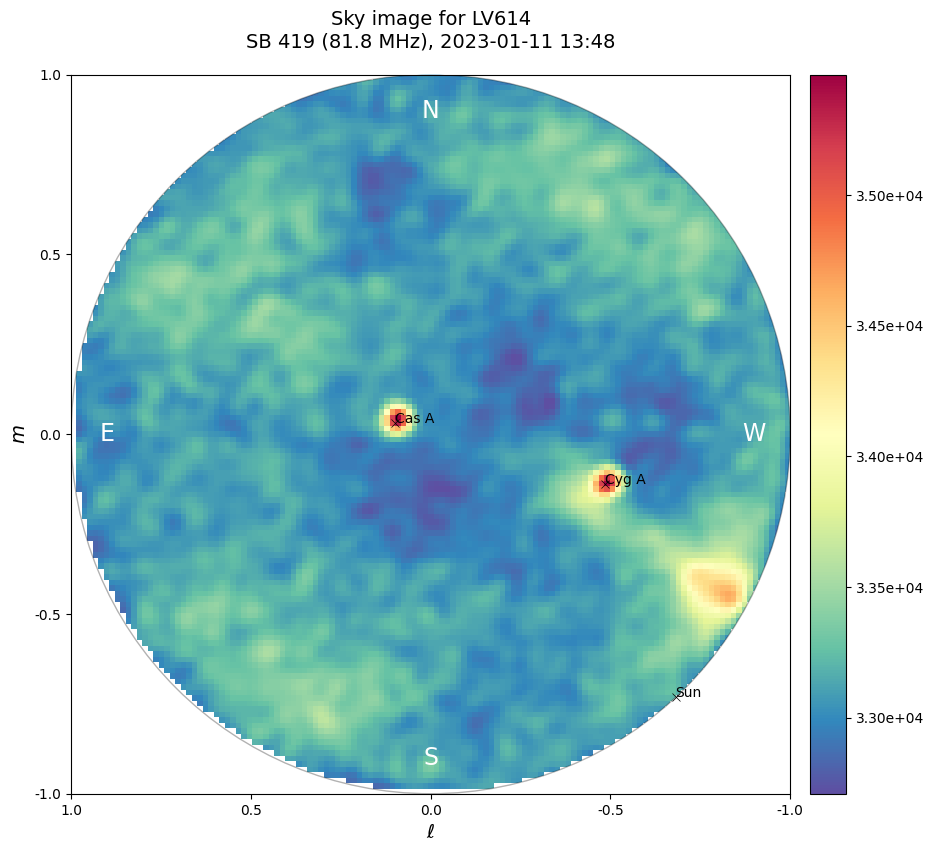

In [11]:
import h5py

# Open the HDF5 file
h5file = h5py.File(r"C:\Users\jorge\OneDrive\Escritorio\BachelorTesis\scripts\lofarimaging\imgSameSubband\results.h5", 'r')

# List all observation numbers (group names) in the HDF5 file
obsnums = list(h5file.keys())

from lofarimaging import make_sky_movie
make_sky_movie('./movies/movie_for_subbands_160_277_419.mp4', h5file, obsnums)

In [9]:
import cv2
import glob
import os

image_folder = "./imgSameSubband"

# nearfield_calibrated
# sky_calibrated
image_files = sorted(glob.glob(os.path.join(image_folder, "*sky_calibrated*.png")))

if not image_files:
    print("No images found!")
    exit()

frame = cv2.imread(image_files[0])
height, width, layers = frame.shape

output_file = "./videoResults/imgSameSubband283_55-3MHzFF.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
fps = 1  # Frames per second

video = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

for img in image_files:
    frame = cv2.imread(img)
    video.write(frame)

video.release()
print(f"Video saved as {output_file}")


Video saved as ./videoResults/imgSameSubband283_55-3MHzFF.mp4
